In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn import linear_model  

In [2]:
df = pd.read_csv(r"C:\Users\91866\OneDrive\Documents\house price 1.csv")

In [3]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


Linear regression with singlr variable

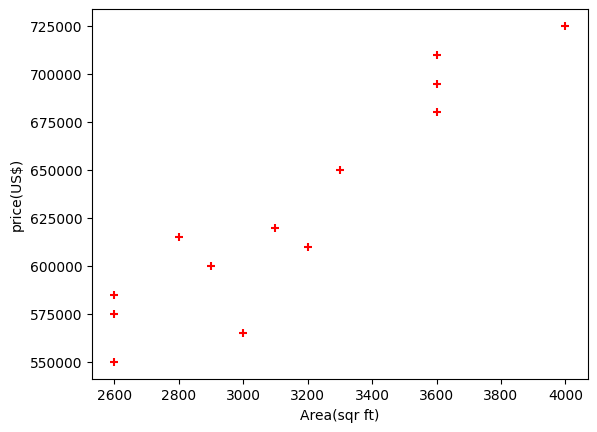

In [4]:
%matplotlib inline
plt.xlabel('Area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)        # fit means we are training the model bades on present dataset

LinearRegression()

In [6]:
reg.predict([[3300]])   # 2 square brackets means 2D

c:\Users\91866\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([647429.99377722])

In [7]:
reg.coef_

array([118.29495955])

In [8]:
reg.intercept_

np.float64(257056.627255756)

y=m*x+b
m=135... * 3300 + 180616... = 628715...

In [9]:
d=pd.read_csv(r"C:\Users\91866\OneDrive\Documents\area 1.csv")

In [10]:
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [11]:
p=reg.predict(d)

In [12]:
d['prices']=p      # To create a new column in our original data frame

In [13]:
d

,area,prices
0,1000,3.753516e+05
1,1500,4.344991e+05
2,2300,5.291350e+05
3,3540,6.758208e+05
4,4120,7.444319e+05
5,4560,7.964816e+05
6,5490,9.064960e+05
7,3460,6.663572e+05
8,4750,8.189577e+05
9,2300,5.291350e+05


In [14]:
d.to_csv("prediction.csv",index=False)

Plot of predicted linear regression

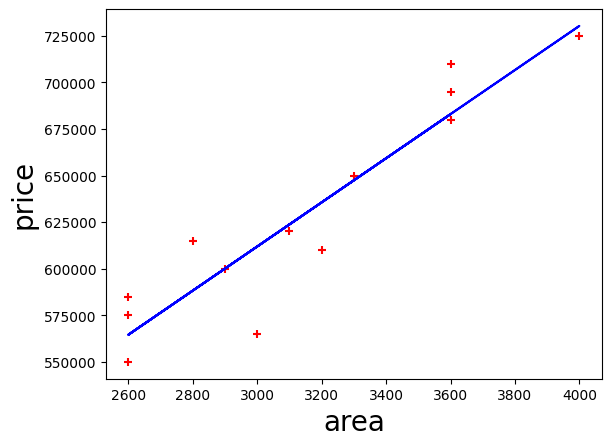

In [15]:
%matplotlib inline
plt.xlabel('area',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker ='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [16]:
df = pd.read_csv(r"C:\Users\91866\OneDrive\Documents\house price 1.csv")

In [17]:
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


Data preprocessing : Handling NA values     # taking median of the column and then put it in place of NaN

In [18]:
import math
med_bedrooms=math.floor(df.bedrooms.median())
med_bedrooms

AttributeError: 'DataFrame' object has no attribute 'bedrooms'

In [ ]:
df.bedrooms.fillna(med_bedrooms)

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: bedrooms, dtype: float64

In [ ]:
df.bedrooms=df.bedrooms.fillna(med_bedrooms)
df

,area,price,bedrooms,age
0,2600,550000,3.0,20
1,3000,565000,4.0,15
2,3200,610000,3.0,18
3,3600,680000,3.0,30
4,4000,725000,5.0,8


In [ ]:
reg1=linear_model.LinearRegression()
reg1.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg1.coef_

array([  143.625, -6762.5  ,   337.5  ])

In [ ]:
reg1.intercept_

np.float64(173112.5)

In [ ]:
reg1.predict([[3800,5,25]])

C:\Users\91866\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([693512.5])

Gradient descent and cost Function

In [ ]:
import numpy as np
def gradient_descent(x,y):
    m_curr=b_curr=0
    iter=10
    n=len(x)
    learning_rate=0.08
    
    for i in range(iter):
        y_predicted=m_curr * x + b_curr
        cost =(1/n)*sum([val**2 for val in (y-y_predicted)])
        md=-(2/n)* sum(x*(y-y_predicted))
        bd=-(2/n)* sum(x*(y-y_predicted))
        m_curr=m_curr - learning_rate * md
        b_curr=m_curr - learning_rate * bd
        print("m {},b {} ,cost{} iter {}".format(m_curr,b_curr,cost,i))
                    

x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])
gradient_descent(x,y)

m 4.96,b 9.92 ,cost89.0 iter 0
m -3.571200000000002,b -12.102400000000003 ,cost267.16319999999996 iter 1
m 13.483264000000005,b 30.537728000000012 ,cost1074.3343948800007 iter 2
m -19.945390080000017,b -53.37404416000004 ,cost4106.1833399377965 iter 3
m 45.73803765760004,b 111.4214653952001 ,cost15898.536795220716 iter 4
m -83.28321200947207,b -212.30446167654418 ,cost61251.24229604125 iter 5
m 170.16138273194002,b 423.60597747335214 ,cost236532.6362854805 iter 6
m -327.69352006348345,b -825.5484228589069 ,cost912348.241895241 iter 7
m 650.2703182205228,b 1628.234156504529 ,cost3521170.754364741 iter 8
m -1270.7978369697714,b -3191.8659921600656 ,cost13585730.906732429 iter 9


In [ ]:
import pickle     # For large numpy arrays loblib will be more efficient than pickle

In [ ]:
 with open('model_pickle','wb') as f:
     pickle.dump(reg,f)

In [ ]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [ ]:
print(mp.n_features_in_)  # This represents number of input our prediction expects

1


In [ ]:
# Example input: [feature1, feature2, feature3]
mp.predict([[5000]])  # Replace with actual values


C:\Users\91866\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
import joblib

In [ ]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [ ]:
mj=joblib.load('model_joblib')      # U can use this to predict 

In [ ]:
mj.predict([[5000]])

C:\Users\91866\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

Categorial , Dummy Variables , OneHot Encoding

In [ ]:
import pandas as pd
df2 = pd.read_csv(r"C:\Users\91866\OneDrive\Documents\house price 1.csv")
df2

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
dummies=pd.get_dummies(df2.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [ ]:
merged=pd.concat([df2,dummies])       #     this is wrong
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600.0,550000.0,NaN,NaN,NaN
1,monroe township,3000.0,565000.0,NaN,NaN,NaN
2,monroe township,3200.0,610000.0,NaN,NaN,NaN
3,monroe township,3600.0,680000.0,NaN,NaN,NaN
4,monroe township,4000.0,725000.0,NaN,NaN,NaN
5,west windsor,2600.0,585000.0,NaN,NaN,NaN
6,west windsor,2800.0,615000.0,NaN,NaN,NaN
7,west windsor,3300.0,650000.0,NaN,NaN,NaN
8,west windsor,3600.0,710000.0,NaN,NaN,NaN
9,robinsville,2600.0,575000.0,NaN,NaN,NaN


In [ ]:
merged=pd.concat([df2,dummies],axis='columns')       #     this is correct
merged             # we need to drop a dummy column as per rule for the perfect functioning 

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [ ]:
final = merged.drop(['town', 'west  windsor'], axis=1)  # ✅ Use axis=1 for columns
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [ ]:
print(merged.columns.tolist())

['town', 'area', 'price', 'monroe township', 'robinsville', 'west  windsor']


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
X=final.drop('price',axis='columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [ ]:
y=final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict([[2800,0,1]])     # X is input ,i have to give and y is output(price) ,it will return

C:\Users\91866\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
dfle=df2
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
X=dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [ ]:
y=dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0])       # error is because argument 'categorical_features' is removed in new version

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'categorical_features'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()   
X=ohe.fit_transform(X).toarray()
X

array([[0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 

In [ ]:
X=X[:,1:]
X

array([[1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1.,

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
print(model.n_features_in_) 

23


In [ ]:
model.predict([[2800,0,1]])  # because of the earlier error

ValueError: X has 3 features, but LinearRegression is expecting 23 features as input.

Train and test the model

In [ ]:
import pandas as pd
df3=pd.read_csv(r"C:\Users\91866\OneDrive\Documents\train and test.csv")
df3

,mileage,age,price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Car Mileage VS Price

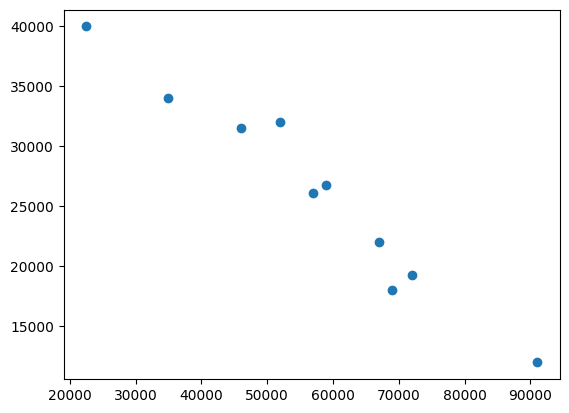

In [ ]:
plt.scatter(df3['mileage'],df3['price'])

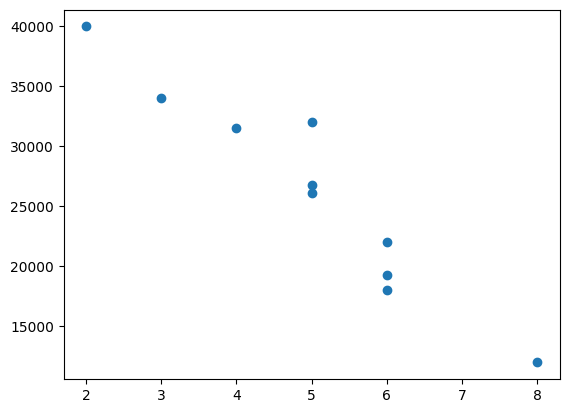

In [ ]:
plt.scatter(df3['age'],df3['price'])

In [ ]:
x=df3[['mileage','age']]
y=df3[['price']]
x

,mileage,age
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
y

,price
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [ ]:
x_train    # it changes every time execute it after executing the above code

,mileage,age
7,72000,6
8,91000,8
3,22500,2
2,57000,5
6,52000,5
1,35000,3
5,59000,5
9,67000,6


In [ ]:
# To avoid it  ,Use random_state

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
x_train  

,mileage,age
5,59000,5
6,52000,5
3,22500,2
1,35000,3
0,69000,6
7,72000,6
4,46000,4
9,67000,6


In [ ]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [ ]:
clf.predict(x_test)

array([[12325.79413829],
       [26257.13408213]])

In [ ]:
y_test

,price
8,12000
2,26100


In [ ]:
clf.score(x_test,y_test)

0.9986838394415276

LOGISTIC REGRESSION 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

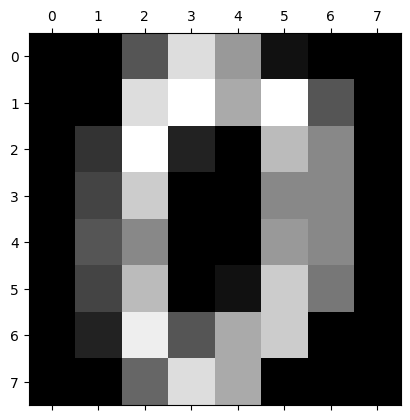

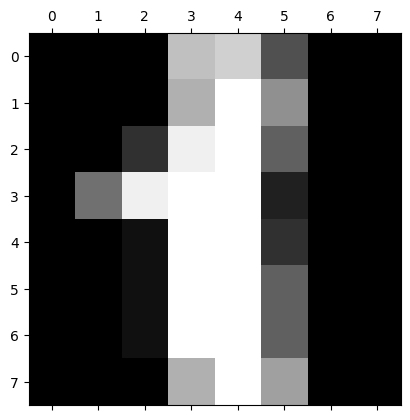

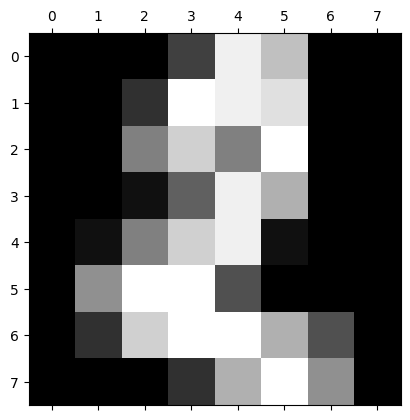

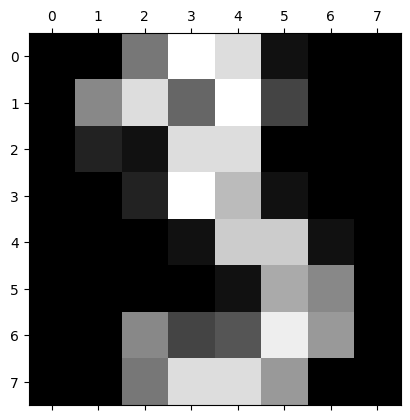

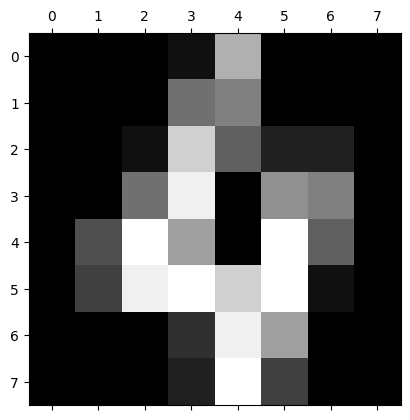

In [ ]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
len(X_train)

1437

In [ ]:
len(X_test)

360

In [ ]:
from sklearn .linear_model import LogisticRegression
m2=LogisticRegression()

In [ ]:
m2.fit(X_train,y_train)

C:\Users\91866\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
m2.score(X_test,y_test)

0.9555555555555556

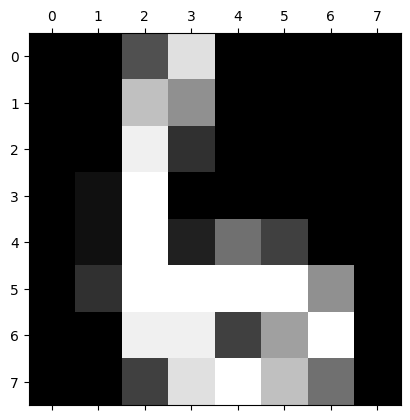

In [ ]:
plt.matshow(digits.images[67])

In [ ]:
digits.target[67]     # 6

np.int64(6)

In [ ]:
m2.predict([digits.data[67]])

array([6])

In [ ]:
m2.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [ ]:
y_predicted=m2.predict(X_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  0, 38,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  1,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 36]])

Text(95.72222222222221, 0.5, 'Truth')

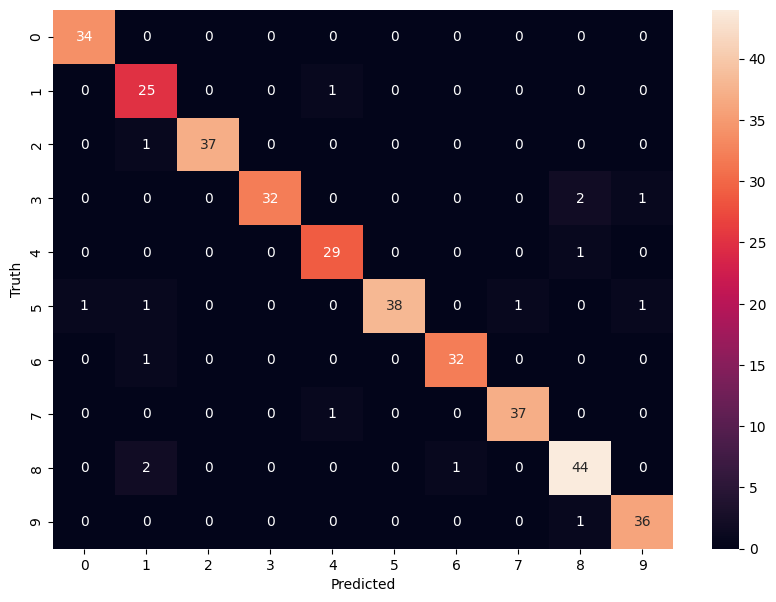

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Support vector Machine

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target       # adding the column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

creating new column using existing column

In [ ]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [ ]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


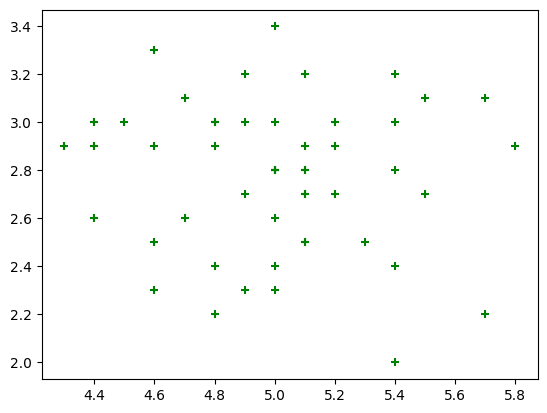

In [ ]:
plt.scatter(df0['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='+')

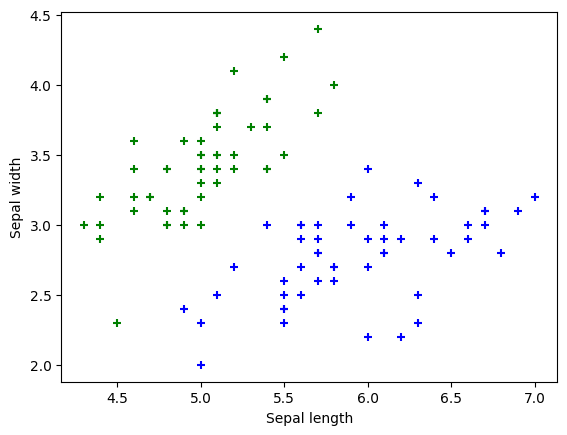

In [ ]:
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train)

120

In [ ]:
len(x_test)

30

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear')

In [ ]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
model.score(x_test,y_test)

1.0